<a href="https://colab.research.google.com/github/DangPhan23/BT_AI_GIUA_KY/blob/main/Bai_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Kết nối  Google Drive với Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Khai báo các thư viện cho mô hình mạng neural 
from keras import losses
from os import listdir
from numpy import asarray,save
import numpy as np
from keras.utils import load_img,img_to_array,to_categorical
from keras.utils.image_utils import img_to_array
from keras.models import Sequential,Model
from keras.layers import Conv2D,Dense,Dropout,Normalization,MaxPooling2D,Input,Flatten,LeakyReLU
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
#Tải các tệp ảnh trong Google Drive lên Google Colab
folder ='/content/drive/MyDrive/AI/my_pic/'
photos, labels = list(), list()
for file in listdir(folder):
  output= 0.0
  if file.startswith('Dang'):
    output= 1.0
  if file.startswith('Dung'):
    output= 2.0
  if file.startswith('Lam'):
    output= 3.0
  if file.startswith('Phong'):
    output= 4.0
  if file.startswith('Quyet'):
    output= 5.0
  
  photo = load_img(folder + file, target_size= (40,40))
  photo= img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos= asarray(photos)
labels= asarray(labels)
#Lưu file photos và labels vào Google Drive 
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/AI/my_pic/pic_photos.npy',photos)
save('/content/drive/MyDrive/AI/my_pic/pic_labels.npy',labels)

(162, 40, 40, 3) (162,)


In [ ]:
split_index = int(0.05 * len(photos))
x_train = photos[split_index:]
y_train = labels[split_index:]
x_test = photos[:split_index]
y_test =  labels[:split_index]
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(154, 40, 40, 3) (8, 40, 40, 3) (154,) (8,)


In [ ]:
x_train = x_train.reshape(154, 40, 40, 3) 
x_train = x_train.astype('float32')/255

x_test = x_test.reshape(8, 40, 40, 3) #
x_test = x_test.astype('float32')/255

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [ ]:
#Xây dựng mô hình mạng CNN
model = Sequential()
## lop CNN1
model.add(Conv2D(32,kernel_size=(3,3), activation='linear', input_shape=(40, 40, 3), padding='same')) #32 lan tich chap
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
## lop CNN2
model.add(Conv2D(64,(3,3),activation='linear',padding='same')) #64 lan tich chap
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
## lop CNN3
model.add(Conv2D(128,(3,3),activation='linear',padding='same')) #128 lan tich chap
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
## lop CNN4
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(256, (3,3), activation = 'linear', padding = 'same'))#256 lan tich chap
model.add(LeakyReLU(alpha = 0.1))
## lop CNN5
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(512, (3,3), activation = 'linear', padding = 'same'))#512 lan tich chap
model.add(LeakyReLU(alpha = 0.1))

#Đưa vào ANN để phân loại:
model.add(Flatten())
model.add(Dense(128,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 40, 40, 32)        896       
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 40, 40, 32)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 20, 20, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 20, 20, 64)        18496     
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 20, 20, 64)        0         
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 10, 10, 64)       0         
 g2D)                                                 

In [ ]:
#Train model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history=model.fit(x_train, y_train, batch_size= 16, epochs= 10, verbose= 1)

Epoch 1/10
10/10 [==============================] - 5s 254ms/step - loss: 1.6562 - accuracy: 0.2922
Epoch 2/10
10/10 [==============================] - 2s 220ms/step - loss: 1.0121 - accuracy: 0.6948
Epoch 3/10
10/10 [==============================] - 2s 221ms/step - loss: 0.4047 - accuracy: 0.8636
Epoch 4/10
10/10 [==============================] - 2s 217ms/step - loss: 0.1112 - accuracy: 0.9675
Epoch 5/10
10/10 [==============================] - 3s 258ms/step - loss: 0.0288 - accuracy: 0.9935
Epoch 6/10
10/10 [==============================] - 4s 355ms/step - loss: 0.2153 - accuracy: 0.9545
Epoch 7/10
10/10 [==============================] - 2s 225ms/step - loss: 0.0191 - accuracy: 1.0000
Epoch 8/10
10/10 [==============================] - 2s 219ms/step - loss: 0.0071 - accuracy: 1.0000
Epoch 9/10
10/10 [==============================] - 3s 260ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 10/10
10/10 [==============================] - 2s 228ms/step - loss: 6.3677e-04 - accuracy: 1.

<ipython-input-29-c59af3df7e75>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, accuracy, 'b', label='Training accuracy', color='red')


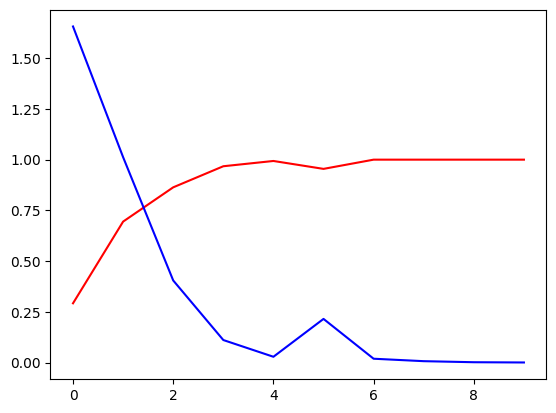

In [ ]:
#Biểu thị thông số lên biểu đồ
accuracy =history.history['accuracy']
loss = history.history['loss']
epochs=range(len(accuracy))
epochs=range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy', color='red')
plt.plot(epochs,loss , 'b', label ='Training loss')
plt.show()

In [ ]:
#Kiểm tra độ chính xác và lưu model đã train vào Google Drive
model.save('/content/drive/MyDrive/AI/flowers/flowers.h5')
test_acc = model.evaluate(x_test,y_test)
print("Do chinh xac:  ",test_acc)

1/1 [==============================] - 0s 47ms/step - loss: 0.0032 - accuracy: 1.0000
Do chinh xac:   [0.0031803222373127937, 1.0]


1/1 [==============================] - 0s 156ms/step
Lam


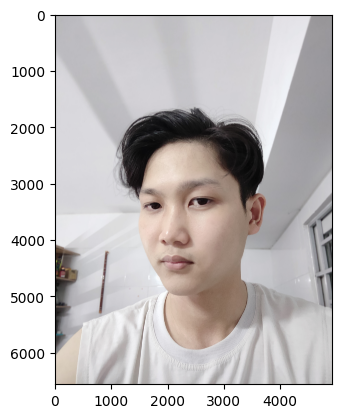

1/1 [==============================] - 0s 27ms/step
Quyet


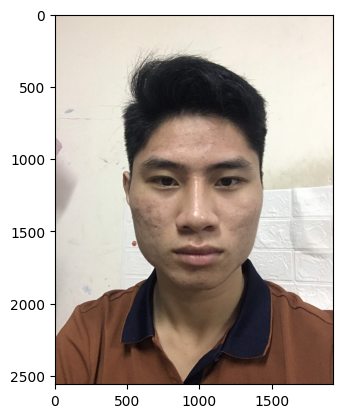

1/1 [==============================] - 0s 26ms/step
Phong


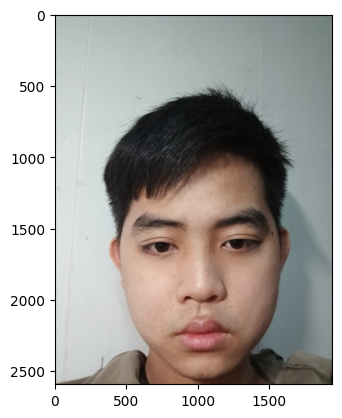

1/1 [==============================] - 0s 54ms/step
Dung


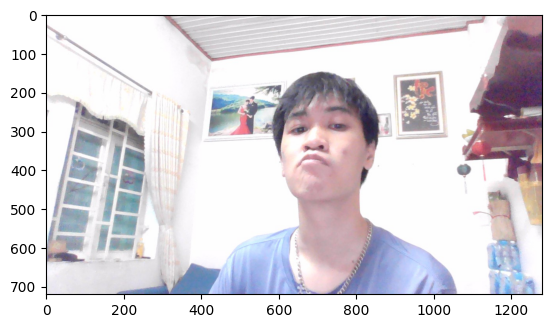

1/1 [==============================] - 0s 40ms/step
Dang


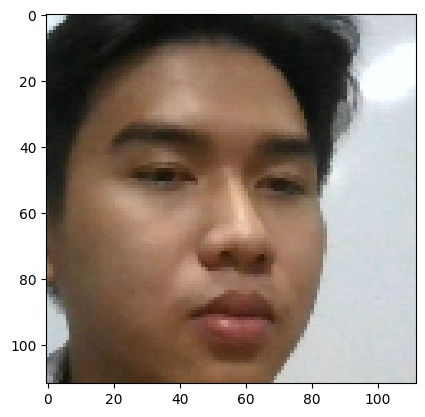

In [ ]:
#Test mô hình
folder = '/content/drive/MyDrive/AI/Test/Test_my_pic/'
for file in listdir(folder):
  photo = load_img(folder  +  file)
  plt.imshow(photo)
  
  photo = load_img(folder +   file, target_size = (40, 40))
  photo=img_to_array(photo)
  photo=photo.astype('float32')
  photo=photo/255
  photo=np.expand_dims(photo,axis=0)
  result=(model.predict(photo).argmax())
  name_pic=['','Dang', 'Dung', 'Lam', 'Phong', 'Quyet']
  print(name_pic[result])
  plt.show()